In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
import seaborn as sns

In [3]:
filepath = "Resources/Cleaned.csv"
df = pd.read_csv(filepath)
df.price.unique()

array(['$$$$$', '$$$$', '$$$', '$$', '$', 'No Price'], dtype=object)

In [4]:
mask = df.price != "No Price"
df_price = df.loc[mask]
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519 entries, 0 to 689
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           519 non-null    int64  
 1   name                 519 non-null    object 
 2   year                 519 non-null    int64  
 3   latitude             519 non-null    float64
 4   longitude            519 non-null    float64
 5   city                 519 non-null    object 
 6   region               519 non-null    object 
 7   zipCode              519 non-null    object 
 8   cuisine              519 non-null    object 
 9   price                519 non-null    object 
 10  url                  519 non-null    object 
 11  Michelin Star Count  519 non-null    int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 52.7+ KB


In [5]:
df1 = df_price.groupby("region")["price"].count()
df1


region
Austria           19
California        90
Chicago           22
Croatia            5
Czech Republic     2
Denmark           28
Finland            6
Greece             4
Hong Kong         63
Hungary            6
Macau             19
New York City     74
Norway             8
Poland             2
Rio de Janeiro     6
Sao Paulo         12
Singapore         39
South Korea       26
Sweden            22
Taipei            24
Thailand          26
Washington DC     16
Name: price, dtype: int64

In [6]:
mask1 = df_price.price == "$"
mask2 = df_price.price == "$$"
mask3 = df_price.price == "$$$"
mask4 = df_price.price == "$$$$"
mask5 = df_price.price == "$$$$$"
df1d = df_price.loc[mask1]
df1dol = df1d.region.value_counts()


In [7]:
df2d = df_price.loc[mask2]
df2dol = df2d.region.value_counts()

In [8]:
df3d = df_price.loc[mask3]
df3dol = df3d.region.value_counts()

In [9]:
df4d = df_price.loc[mask4]
df4dol = df4d.region.value_counts()

In [10]:
df5d = df_price.loc[mask5]
df5dol = df5d.region.value_counts()

In [11]:
regpr_df = pd.concat([df1dol, df2dol, df3dol, df4dol, df5dol, df1], axis=1)
regpr_df.columns = ["$ Count", "$$ Count", "$$$ Count", "4$ Count", "5$ Count", "Total"]
regpr_df = regpr_df.fillna(0)
#regpr.style.format({"$ Count":, "$$ Count", "$$$ Count", "4$ Count", "5$ Count"})

In [12]:
regpr_df.astype(int)

,$ Count,$$ Count,$$$ Count,4$ Count,5$ Count,Total
Singapore,16,11,7,3,2,39
Hong Kong,9,15,18,10,11,63
Macau,3,8,5,2,1,19
Taipei,1,9,8,6,0,24
South Korea,1,1,18,3,3,26
Thailand,1,4,6,9,6,26
New York City,0,7,15,52,0,74
California,0,6,23,61,0,90
Denmark,0,6,12,10,0,28
Washington DC,0,4,4,8,0,16


In [14]:
df_price['Price Point'] = df_price['price'].apply(lambda x: len(x))
df_price.head()

<ipython-input-14-c12ded5f275e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price['Price Point'] = df_price['price'].apply(lambda x: len(x))


,Unnamed: 0,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url,Michelin Star Count,Price Point
0,0,Kilian Stuba,2019,47.348580,10.17114,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...,1,5
1,1,Pfefferschiff,2019,47.837870,13.07917,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5
2,2,Esszimmer,2019,47.806850,13.03409,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5
3,3,Carpe Diem,2019,47.800010,13.04006,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...,1,5
4,4,Edvard,2019,48.216503,16.36852,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...,1,4


In [15]:
avgs = df_price.groupby('cuisine')['Price Point'].mean()
count = df_price.groupby('cuisine')['name'].count()
star = df_price.groupby('cuisine')["Michelin Star Count"].mean()
summ1 = pd.concat([avgs, star, count], axis=1).reset_index()
summ1.columns = ["Cuisine", "Average Price Point ($)", "Average Michelin Star Rating", "Total Restaurants"]
summ2 = summ1.sort_values(by=["Total Restaurants"], ascending=False).head(10)
summ2.style.format({"Average Price Point ($)":"{:.3f}", "Average Michelin Star Rating":"{:.3f}"})

,Cuisine,Average Price Point ($),Average Michelin Star Rating,Total Restaurants
13,Contemporary,3.693,1.507,75
32,Japanese,3.961,1.176,51
40,Modern cuisine,3.735,1.184,49
8,Cantonese,2.225,1.325,40
14,Creative,4.032,1.484,31
28,Innovative,3.536,1.286,28
21,French contemporary,3.263,1.579,19
30,Italian,3.500,1.167,18
20,French,3.611,1.333,18
53,Sushi,4.000,1.353,17


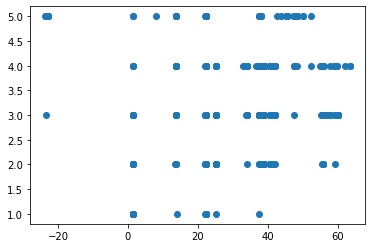

In [16]:
xaxis = df_price.latitude
yaxis = df_price["Price Point"]

plt.scatter(xaxis, yaxis)
plt.show()

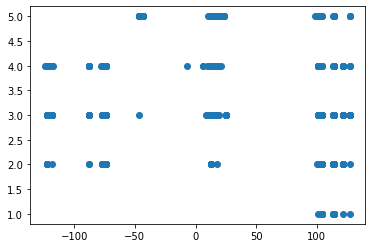

In [17]:
xaxis1 = df_price.longitude
yaxis1 = df_price["Price Point"]

plt.scatter(xaxis1, yaxis1)
plt.show()

In [18]:
mask1 = df_price.price == "$"
mask2 = df_price.price == "$$"
mask3 = df_price.price == "$$$"
mask4 = df_price.price == "$$$$"
mask5 = df_price.price == "$$$$$"
df1d = df_price.loc[mask1]
df1dol = df1d.region.value_counts()



In [19]:
df2d = df_price.loc[mask2]
df2dol = df2d.region.value_counts()
df3d = df_price.loc[mask3]
df3dol = df3d.region.value_counts()
df4d = df_price.loc[mask4]
df4dol = df4d.region.value_counts()
df5d = df_price.loc[mask5]
df5dol = df5d.region.value_counts()
regpr_df = pd.concat([df1dol, df2dol, df3dol, df4dol, df5dol, df1], axis=1)
regpr_df.columns = ["$ Count", "$$ Count", "$$$ Count", "4$ Count", "5$ Count", "Total"]
regpr_df = regpr_df.fillna(0)
#regpr.style.format({"$ Count":, "$$ Count", "$$$ Count", "4$ Count", "5$ Count"})

In [20]:
regpr_df.astype(int)

,$ Count,$$ Count,$$$ Count,4$ Count,5$ Count,Total
Singapore,16,11,7,3,2,39
Hong Kong,9,15,18,10,11,63
Macau,3,8,5,2,1,19
Taipei,1,9,8,6,0,24
South Korea,1,1,18,3,3,26
Thailand,1,4,6,9,6,26
New York City,0,7,15,52,0,74
California,0,6,23,61,0,90
Denmark,0,6,12,10,0,28
Washington DC,0,4,4,8,0,16


In [21]:
avgs = df_price.groupby('cuisine')['Price Point'].mean()
count = df_price.groupby('cuisine')['name'].count()
star = df_price.groupby('cuisine')["Michelin Star Count"].mean()
summ1 = pd.concat([avgs, star, count], axis=1).reset_index()
summ1.columns = ["Cuisine", "Average Price Point ($)", "Average Michelin Star Rating", "Total Restaurants"]
summ2 = summ1.sort_values(by=["Total Restaurants"], ascending=False).head(10)
summ2.style.format({"Average Price Point ($)":"{:.3f}", "Average Michelin Star Rating":"{:.3f}"})

,Cuisine,Average Price Point ($),Average Michelin Star Rating,Total Restaurants
13,Contemporary,3.693,1.507,75
32,Japanese,3.961,1.176,51
40,Modern cuisine,3.735,1.184,49
8,Cantonese,2.225,1.325,40
14,Creative,4.032,1.484,31
28,Innovative,3.536,1.286,28
21,French contemporary,3.263,1.579,19
30,Italian,3.500,1.167,18
20,French,3.611,1.333,18
53,Sushi,4.000,1.353,17


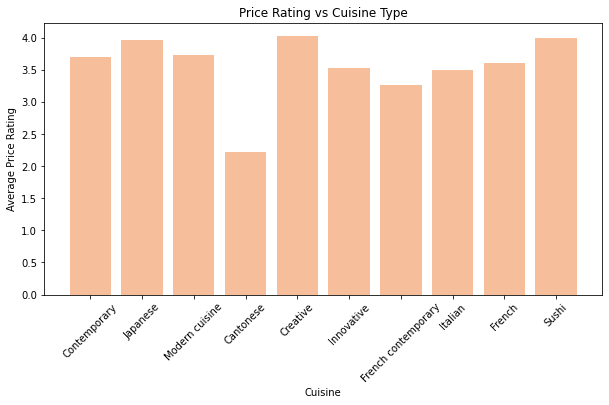

In [33]:
plt.figure(figsize=(10,5))
plt.bar(summ2.Cuisine, summ2["Average Price Point ($)"], color="#F6BE9A")
plt.xlabel("Cuisine")
plt.ylabel("Average Price Rating")
plt.title("Price Rating vs Cuisine Type")
plt.xticks(rotation = 45)
plt.show()

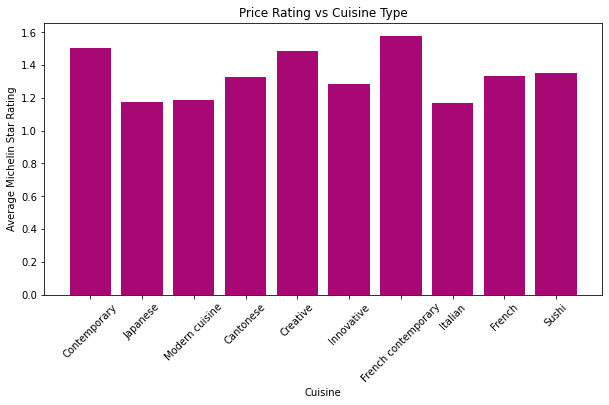

In [32]:
plt.figure(figsize=(10,5))
plt.bar(summ2.Cuisine, summ2["Average Michelin Star Rating"], color="#A80874")
plt.xlabel("Cuisine")
plt.ylabel("Average Michelin Star Rating")
plt.title("Price Rating vs Cuisine Type")
plt.xticks(rotation = 45)
plt.show()

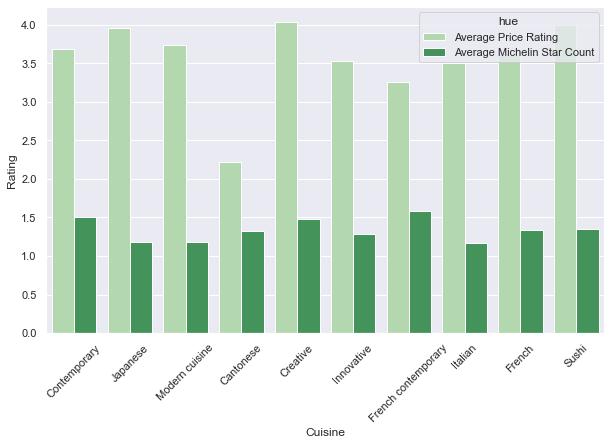

In [45]:
# https://stackoverflow.com/questions/50912819/how-to-combine-two-bar-chart-of-two-files-in-one-diagram-in-matplotlib-pandas
plt.figure(figsize=(10,6))

df1=pd.DataFrame({'Cuisine':['Contemporary', 'Japanese', 'Modern cuisine', 'Cantonese',
       'Creative', 'Innovative', 'French contemporary', 'Italian',
       'French', 'Sushi'],'Rating':[3.69333333, 3.96078431, 3.73469388, 2.225     , 4.03225806,
       3.53571429, 3.26315789, 3.5       , 3.61111111, 4       ]})
df2=pd.DataFrame({'Cuisine':['Contemporary', 'Japanese', 'Modern cuisine', 'Cantonese',
       'Creative', 'Innovative', 'French contemporary', 'Italian',
       'French', 'Sushi'],'Rating':[1.50666667, 1.17647059, 1.18367347, 1.325     , 1.48387097,
       1.28571429, 1.57894737, 1.16666667, 1.33333333, 1.35294118]})
df1['hue']= "Average Price Rating"
df2['hue']= "Average Michelin Star Count"
res=pd.concat([df1,df2])
sns.set(style="darkgrid")

sns.barplot(x='Cuisine',y='Rating',data=res,hue='hue',palette="Greens")
plt.xticks(rotation = 45)
plt.show()